In [1]:
%%capture
! pip install scikit-learn numpy pandas matplotlib

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)


FileUpload(value=(), accept='.csv', description='Upload')

In [37]:
import io

In [40]:
f=uploader.value[0]
ct=f['content']
df=pd.read_csv(io.BytesIO(ct))
df.columns=['id','xval','yval']
df.head()

,id,xval,yval
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


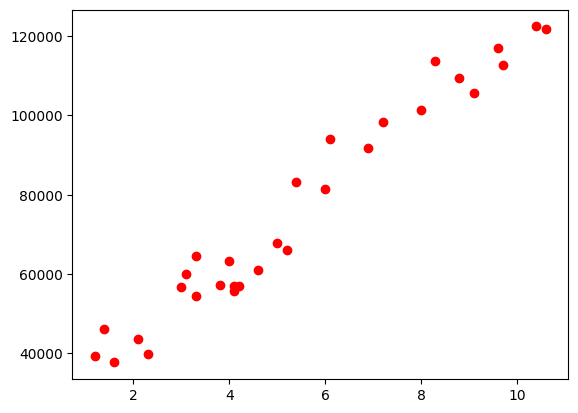

In [41]:
plt.scatter(df['xval'],df['yval'],color="red")

In [43]:
model=LinearRegression(fit_intercept=True)
dftrain=df.iloc[:-20]
dftest=df.iloc[-20:]
model.fit(dftrain[['xval']],dftrain[['yval']])
ypred=model.predict(df[['xval']])

Text(0, 0.5, 'Y Values')

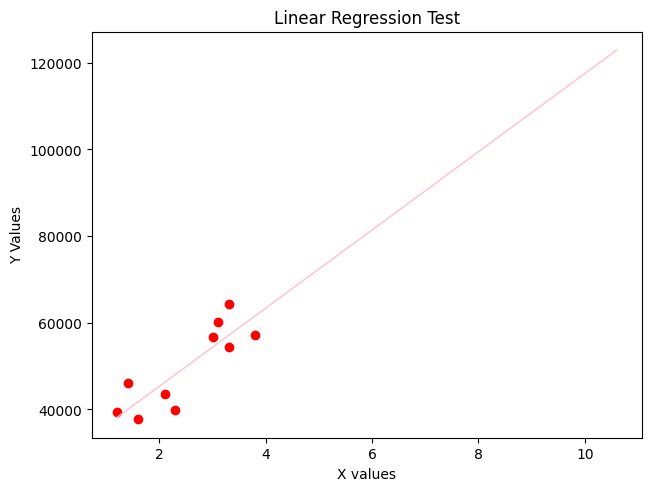

In [44]:
fig,ax=plt.subplots(constrained_layout=True)
ax.scatter(dftrain['xval'],dftrain['yval'],color="red")
ax.plot(df['xval'],ypred,color="pink",linewidth=1,label="Linear Regression Test")
ax.set_title("Linear Regression Test for Salary")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Salary")

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
rsq=r2_score(df[['yval']],ypred)
print(rsq)


0.9549531290834532


In [ ]:
# That is a good r squared value (95% plus)